# Efetuando comparações entre os modelos

Neste notebook serão feitas as comparações qualitativas entre os modelos treinados sobre as features (random forest, regressão linear, NN simples) e o modelo CNN.



## Conectando ao Google Drive

In [1]:
## Conectando o notebook com o Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Testando se o notebook acessa o Drive corretamente
!ls 'drive/' 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
'My Drive'  'Shared drives'


In [2]:
#  Mover a pasta compartilhada para algum lugar em seu proprio drive, 
#  para conseguir acessar um atalho para o diretorio a partir daqui.

## Configurar essa variavel de ambiente (path_dados) para cada pessoa
## Meu caminho no drive (alexandre)
%env drv=drive/My Drive
%env proj=Aulas/2019_2/ie301-projeto/projeto

!ls "$drv/$proj/"
!echo "-------"
!ls .

env: drv=drive/My Drive
env: proj=Aulas/2019_2/ie301-projeto/projeto
cnn-regressao-submission.ipynb	imagens  notebooks
dados				modelos  submission-cnn.csv
-------
drive  sample_data


## Importando bibliotecas

In [3]:
## Basic imports
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

## Utils
import timeit
import time
from tqdm import tqdm
import pickle


Populating the interactive namespace from numpy and matplotlib


## Carregando os resultados

In [0]:
!cp "$drv/$proj/dados/features.pkl" .
with open('features.pkl', 'rb') as f:
    features = pickle.load(f)
    f.close()
features.keys()

df_train = features['df_train']
df_valid = features['df_valid']
col_stats = features['col_stats']
col_mfcc = features['col_mfcc']

del features

## Dropando a coluna y da lista de features
del col_mfcc[0]
del col_stats[0]
## Nova lista completa de features
col_full = col_mfcc + col_stats

In [0]:
## Carregando os resultados Random Forest
!cp "$drv/$proj/modelos/resultados/resultados-rf-50-full.pkl" .
with open('resultados-rf-50-full.pkl', 'rb') as f:
    dados = pickle.load(f)
    f.close()

rf_50_full_pred_valid = dados['rf_50_full_pred_valid']

del dados

In [0]:
## Carregando os resultados LinReg e MLP
!cp "$drv/$proj/modelos/resultados/resultados-mlp-lr.pkl" .
with open('resultados-mlp-lr.pkl', 'rb') as f:
    dados = pickle.load(f)
    f.close()

lr_full_pred_valid = dados['lr_full_pred_valid']
mlp_sigm_full_pred_valid = dados['mlp_sigm_full_pred_valid']

del dados

In [0]:
lr_full_pred_valid[lr_full_pred_valid<0]=0

In [0]:
## Carregando os resultados CNN
!cp "$drv/$proj/modelos/resultados/resultados-cnn.pkl" .
with open('resultados-cnn.pkl', 'rb') as f:
    dados = pickle.load(f)
    f.close()

cnn_pred_valid = dados['cnn_pred_valid']

del dados

## Gráficos dos resultados lado-a-lado

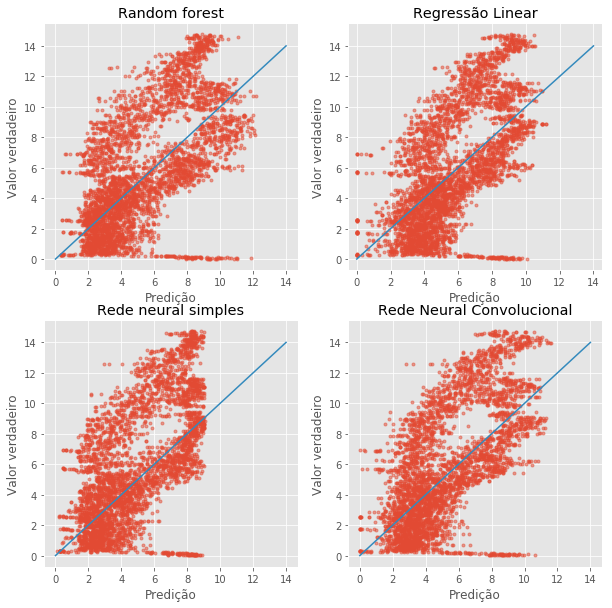

In [9]:
alpha=.5
with plt.style.context('ggplot'):
    figsize(10,10)
    subplot(221)
    plt.title('Random forest')
    plt.plot(rf_50_full_pred_valid, df_valid.loc[:,'y'].values, '.', alpha=alpha);
    plt.ylabel('Valor verdadeiro')
    plt.xlabel('Predição')
    plt.plot([0, 14], [0, 14])
    
    subplot(222)
    plt.title('Regressão Linear')
    plt.plot(lr_full_pred_valid, df_valid.loc[:,'y'].values, '.', alpha=alpha);
    plt.ylabel('Valor verdadeiro')
    plt.xlabel('Predição')
    plt.xlim([-.5, 14.5])
    plt.plot([0, 14], [0, 14])

    subplot(223)
    plt.title('Rede neural simples')
    plt.plot(mlp_sigm_full_pred_valid, df_valid.loc[:,'y'].values, '.', alpha=alpha);
    plt.ylabel('Valor verdadeiro')
    plt.xlabel('Predição')
    plt.plot([0, 14], [0, 14])

    subplot(224)
    plt.title('Rede Neural Convolucional')
    plt.plot(cnn_pred_valid, df_valid.loc[:,'y'].values, '.', alpha=alpha);
    plt.ylabel('Valor verdadeiro')
    plt.xlabel('Predição')
    plt.plot([0, 14], [0, 14])

#     savefig('result-all-cruz.eps', dpi=400, format='eps')
#     savefig('result-all-cruz.png', dpi=400, format='png')

# !cp 'result-all-cruz.'* "$drv/$proj/imagens/"

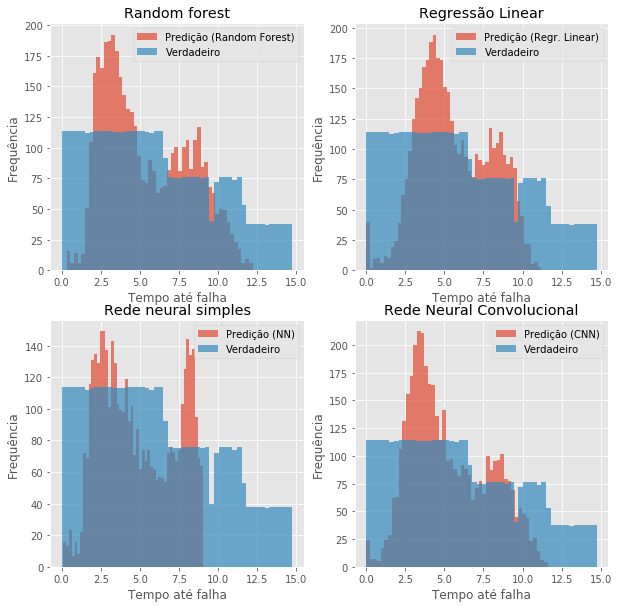

In [0]:
bins = 50
alpha = .7
with plt.style.context('ggplot'):
    figsize(10,10)
    subplot(221)
    plt.title('Random forest')
    plt.hist(rf_50_full_pred_valid, bins=bins, label='Predição (Random Forest)', alpha=alpha)
    plt.hist(df_valid.loc[:,'y'].values, bins=bins, label='Verdadeiro', alpha=alpha)
    plt.ylabel('Frequência')
    plt.xlabel('Tempo até falha')
    plt.legend()
    
    subplot(222)
    plt.title('Regressão Linear')
    plt.hist(lr_full_pred_valid, bins=bins, label='Predição (Regr. Linear)', alpha=alpha)
    plt.hist(df_valid.loc[:,'y'].values, bins=bins, label='Verdadeiro', alpha=alpha)
    plt.ylabel('Frequência')
    plt.xlabel('Tempo até falha')
    plt.legend()

    subplot(223)
    plt.title('Rede neural simples')
    plt.hist(mlp_sigm_full_pred_valid, bins=bins, label='Predição (NN)', alpha=alpha)
    plt.hist(df_valid.loc[:,'y'].values, bins=bins, label='Verdadeiro', alpha=alpha)
    plt.ylabel('Frequência')
    plt.xlabel('Tempo até falha')
    plt.legend()

    subplot(224)
    plt.title('Rede Neural Convolucional')
    plt.hist(cnn_pred_valid, bins=bins, label='Predição (CNN)', alpha=alpha)
    plt.hist(df_valid.loc[:,'y'].values, bins=bins, label='Verdadeiro', alpha=alpha)
    plt.ylabel('Frequência')
    plt.xlabel('Tempo até falha')
    plt.legend()

#     savefig('result-all-cruz.eps', dpi=400, format='eps')
#     savefig('result-all-cruz.png', dpi=400, format='png')

# !cp 'result-all-cruz.'* "$drv/$proj/imagens/"

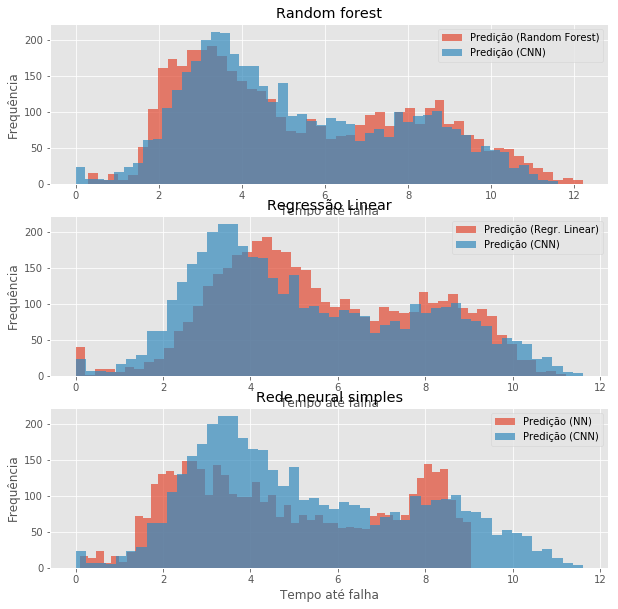

In [0]:
 bins = 50
alpha = .7
with plt.style.context('ggplot'):
    figsize(10,10)
    subplot(311)
    plt.title('Random forest')
    plt.hist(rf_50_full_pred_valid, bins=bins, label='Predição (Random Forest)', alpha=alpha)
    plt.hist(cnn_pred_valid, bins=bins, label='Predição (CNN)', alpha=alpha)
    plt.ylabel('Frequência')
    plt.xlabel('Tempo até falha')
    plt.legend()
    
    subplot(312)
    plt.title('Regressão Linear')
    plt.hist(lr_full_pred_valid, bins=bins, label='Predição (Regr. Linear)', alpha=alpha)
    plt.hist(cnn_pred_valid, bins=bins, label='Predição (CNN)', alpha=alpha)
    plt.ylabel('Frequência')
    plt.xlabel('Tempo até falha')
    plt.legend()

    subplot(313)
    plt.title('Rede neural simples')
    plt.hist(mlp_sigm_full_pred_valid, bins=bins, label='Predição (NN)', alpha=alpha)
    plt.hist(cnn_pred_valid, bins=bins, label='Predição (CNN)', alpha=alpha)
    plt.ylabel('Frequência')
    plt.xlabel('Tempo até falha')
    plt.legend()

    
#     savefig('result-all-cruz.eps', dpi=400, format='eps')
#     savefig('result-all-cruz.png', dpi=400, format='png')

# !cp 'result-all-cruz.'* "$drv/$proj/imagens/"

NameError: ignored

In [0]:
idx_rf

NameError: ignored

In [0]:
alpha=.5
with plt.style.context('ggplot'):
    figsize(10,10)
    subplot(221)
    plt.title('Random forest')
    plt.plot(rf_50_full_pred_valid, df_valid.loc[:,'y'].values, '.', alpha=alpha);
    plt.ylabel('Valor verdadeiro')
    plt.xlabel('Predição')
    plt.plot([0, 14], [0, 14])
    
    subplot(222)
    plt.title('Regressão Linear')
    plt.plot(lr_full_pred_valid, df_valid.loc[:,'y'].values, '.', alpha=alpha);
    plt.ylabel('Valor verdadeiro')
    plt.xlabel('Predição')
    plt.xlim([-.5, 14.5])
    plt.plot([0, 14], [0, 14])

    subplot(223)
    plt.title('Rede neural simples')
    plt.plot(mlp_sigm_full_pred_valid, df_valid.loc[:,'y'].values, '.', alpha=alpha);
    plt.ylabel('Valor verdadeiro')
    plt.xlabel('Predição')
    plt.plot([0, 14], [0, 14])

    subplot(224)
    plt.title('Rede Neural Convolucional')
    plt.plot(cnn_pred_valid, df_valid.loc[:,'y'].values, '.', alpha=alpha);
    plt.ylabel('Valor verdadeiro')
    plt.xlabel('Predição')
    plt.plot([0, 14], [0, 14])

#     savefig('result-all-cruz.eps', dpi=400, format='eps')
#     savefig('result-all-cruz.png', dpi=400, format='png')

# !cp 'result-all-cruz.'* "$drv/$proj/imagens/"